<a href="https://colab.research.google.com/github/vanujiash9/web/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  **1. Đọc dữ liệu và khám phá**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning - Deep learning/Machine learning - Deep learning/Day 3: Neural Networks & Unsupervised 🧠/Lung Cancer Prediction/survey lung cancer.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Dưới đây là giải thích ngắn gọn về ý nghĩa của từng cột trong bảng:

1. **GENDER**: Giới tính của bệnh nhân (thường được mã hóa, ví dụ: 0 = Nữ, 1 = Nam).  
2. **AGE**: Tuổi của bệnh nhân (số nguyên).  
3. **SMOKING**: Mức độ hút thuốc hoặc trạng thái hút thuốc (có thể là 0 = không hút, 1 = hút ít, 2 = hút nhiều, tùy cách mã hóa).  
4. **YELLOW_FINGERS**: Mức độ vàng ố ở ngón tay (thường do hút thuốc).  
5. **ANXIETY**: Mức độ lo âu (có thể là 0/1 hoặc 1/2, tùy mã hóa).  
6. **PEER_PRESSURE**: Áp lực từ bạn bè (có thể thể hiện qua việc hút thuốc hoặc lối sống, mã hóa 0/1 hoặc 1/2).  
7. **CHRONIC DISEASE**: Có bệnh mãn tính hay không (thường là 0 = không, 1 = có).  
8. **FATIGUE**: Mức độ mệt mỏi (có thể 0 = không mệt, 1 = mệt vừa, 2 = mệt nhiều, tùy mã hóa).  
9. **ALLERGY**: Có dị ứng hay không (thường 0/1).  
10. **WHEEZING**: Tình trạng thở khò khè (thường 0 = không, 1 = có).  
11. **ALCOHOL CONSUMING**: Mức độ tiêu thụ rượu/bia (0/1 hoặc 1/2, tùy mã hóa).  
12. **COUGHING**: Mức độ ho (0/1 hoặc 1/2, tùy mã hóa).  
13. **SHORTNESS OF BREATH**: Khó thở (0 = không, 1 = có).  
14. **SWALLOWING DIFFICULTY**: Khó nuốt (0 = không, 1 = có).  
15. **CHEST PAIN**: Đau ngực (0 = không, 1 = có).  
16. **LUNG_CANCER**: Nhãn cho biết bệnh nhân có ung thư phổi hay không (0 = không, 1 = có).



In [ ]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.duplicated().sum()

np.int64(33)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(276, 16)

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# **2. Mã hóa nhãn cho biến phân loại**


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])


MAN là 1 WOMAN là 0

In [ ]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


# **3. Phân bố của biến mục tiêu (LUNG_CANCER)**


Text(0.5, 1.0, 'Target Distribution')

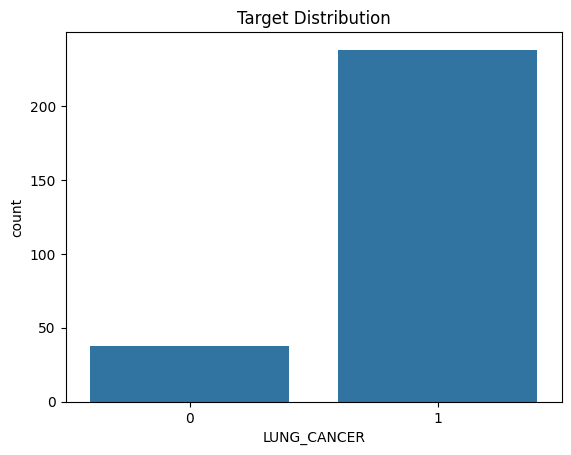

In [ ]:
sns.countplot(x = 'LUNG_CANCER', data= df)
plt.title('Target Distribution')

In [ ]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,238
0,38


In [ ]:
def plot(col, df=df):
  return df.groupby(col)['LUNG_CANCER'].value_counts(normalize = True).unstack().plot(kind = 'bar', figsize =(8,5))

<Axes: xlabel='GENDER'>

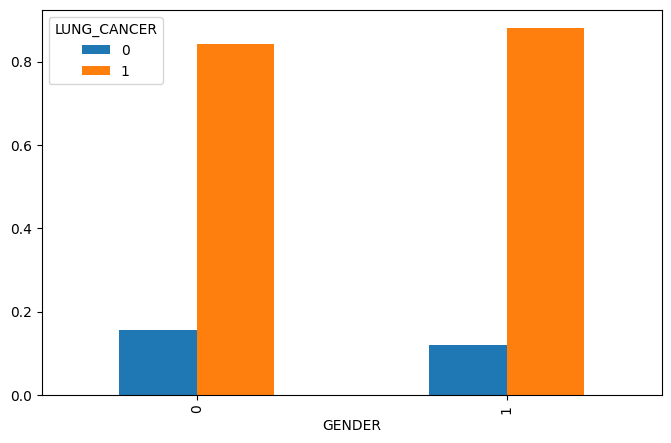

In [ ]:
plot('GENDER')

In [ ]:
df['GENDER'].value_counts()

,count
GENDER,
1,142
0,134


<Axes: xlabel='SMOKING'>

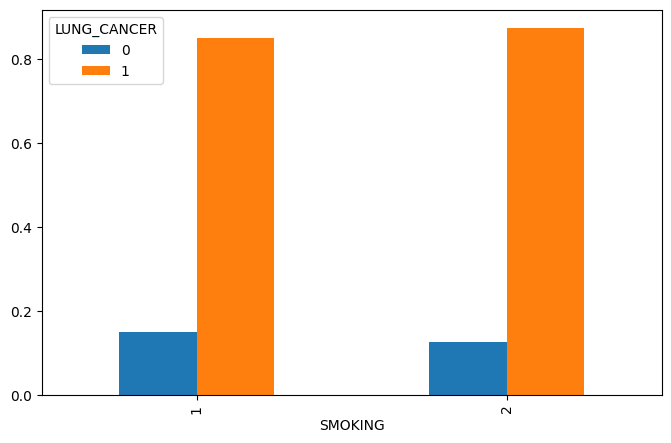

In [ ]:
plot('SMOKING')

In [ ]:
df['AGE'].value_counts()

,count
AGE,
64,18
60,16
62,16
56,16
59,15
63,15
61,14
70,14
67,11


<Axes: xlabel='YELLOW_FINGERS'>

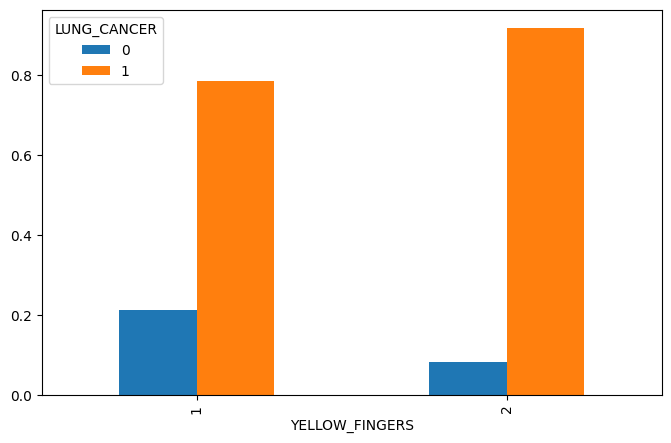

In [ ]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

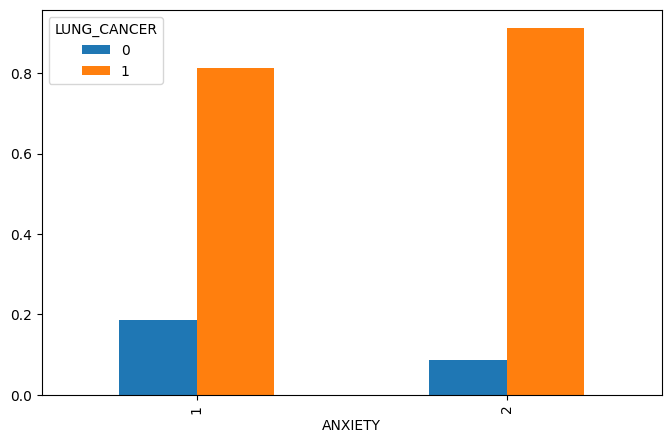

In [ ]:
plot('ANXIETY')


<Axes: xlabel='PEER_PRESSURE'>

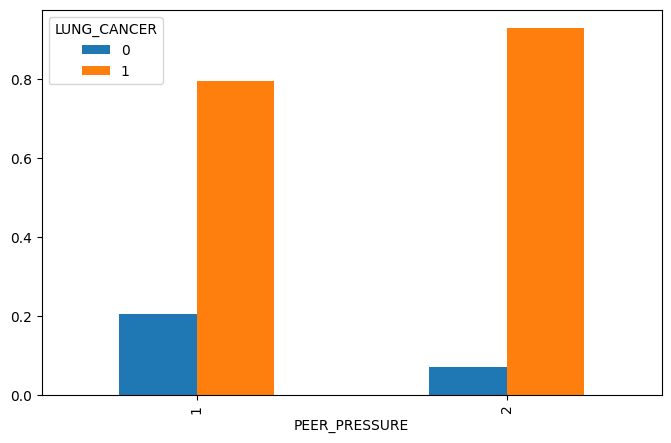

In [ ]:
plot('PEER_PRESSURE')


<Axes: xlabel='CHRONIC DISEASE'>

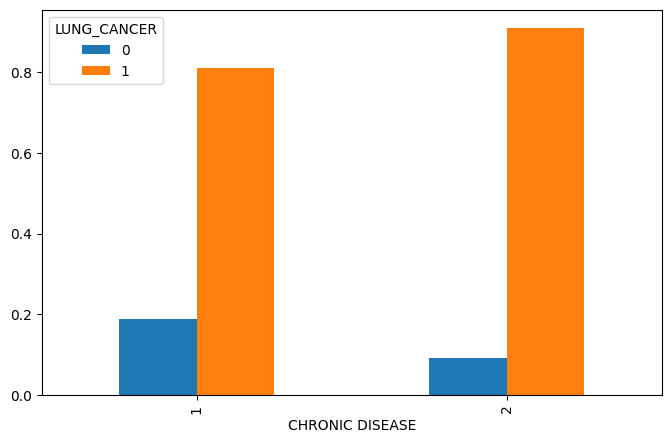

In [ ]:
plot('CHRONIC DISEASE')


<Axes: xlabel='FATIGUE '>

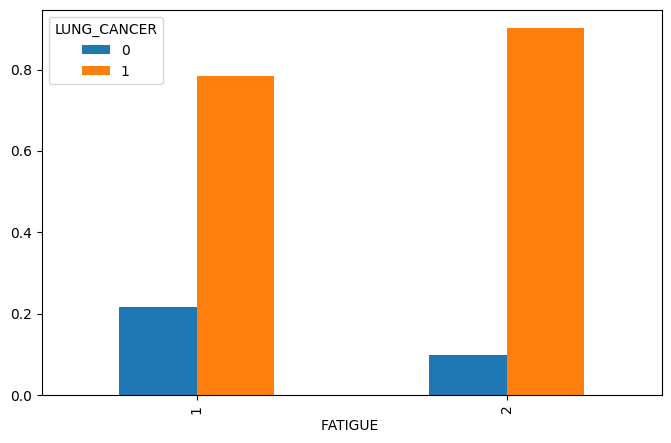

In [ ]:
plot('FATIGUE ')


<Axes: xlabel='ALLERGY '>

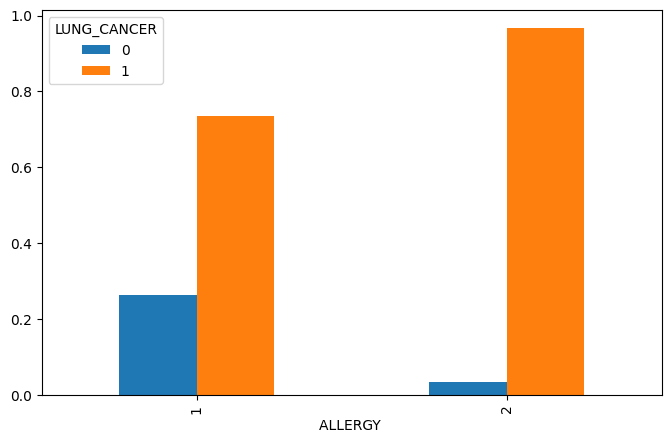

In [ ]:
plot('ALLERGY ')


<Axes: xlabel='WHEEZING'>

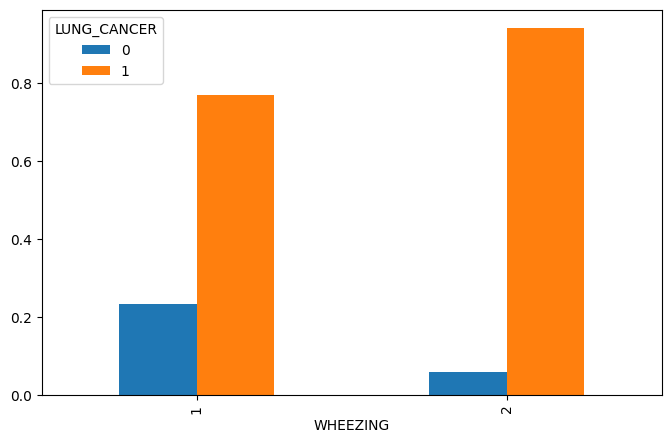

In [ ]:
plot('WHEEZING')


<Axes: xlabel='ALCOHOL CONSUMING'>

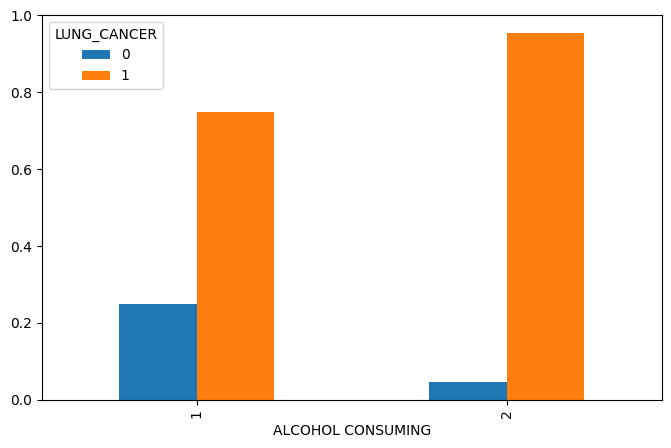

In [ ]:
plot('ALCOHOL CONSUMING')


<Axes: xlabel='COUGHING'>

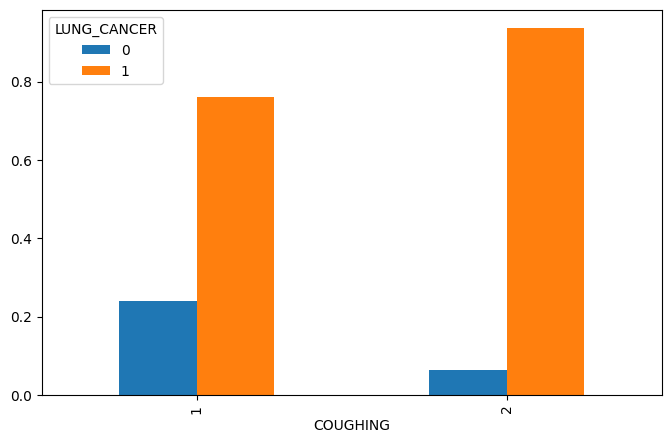

In [ ]:
plot('COUGHING')


<Axes: xlabel='SHORTNESS OF BREATH'>

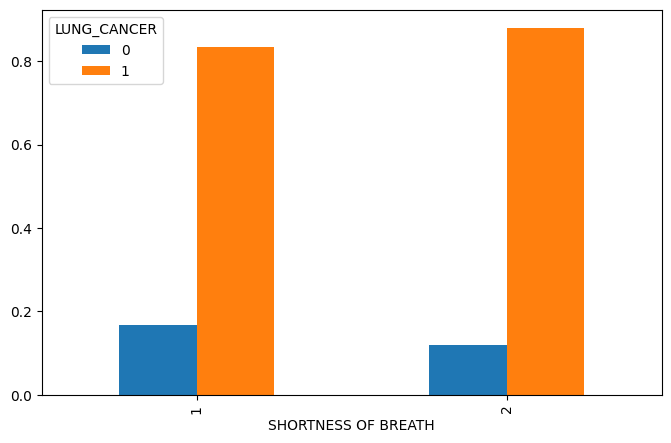

In [ ]:
plot('SHORTNESS OF BREATH')


<Axes: xlabel='SWALLOWING DIFFICULTY'>

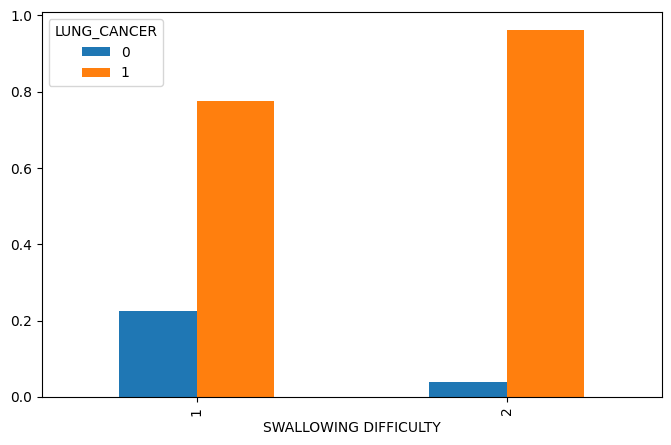

In [ ]:
plot('SWALLOWING DIFFICULTY')


In [ ]:
df.shape

(276, 16)

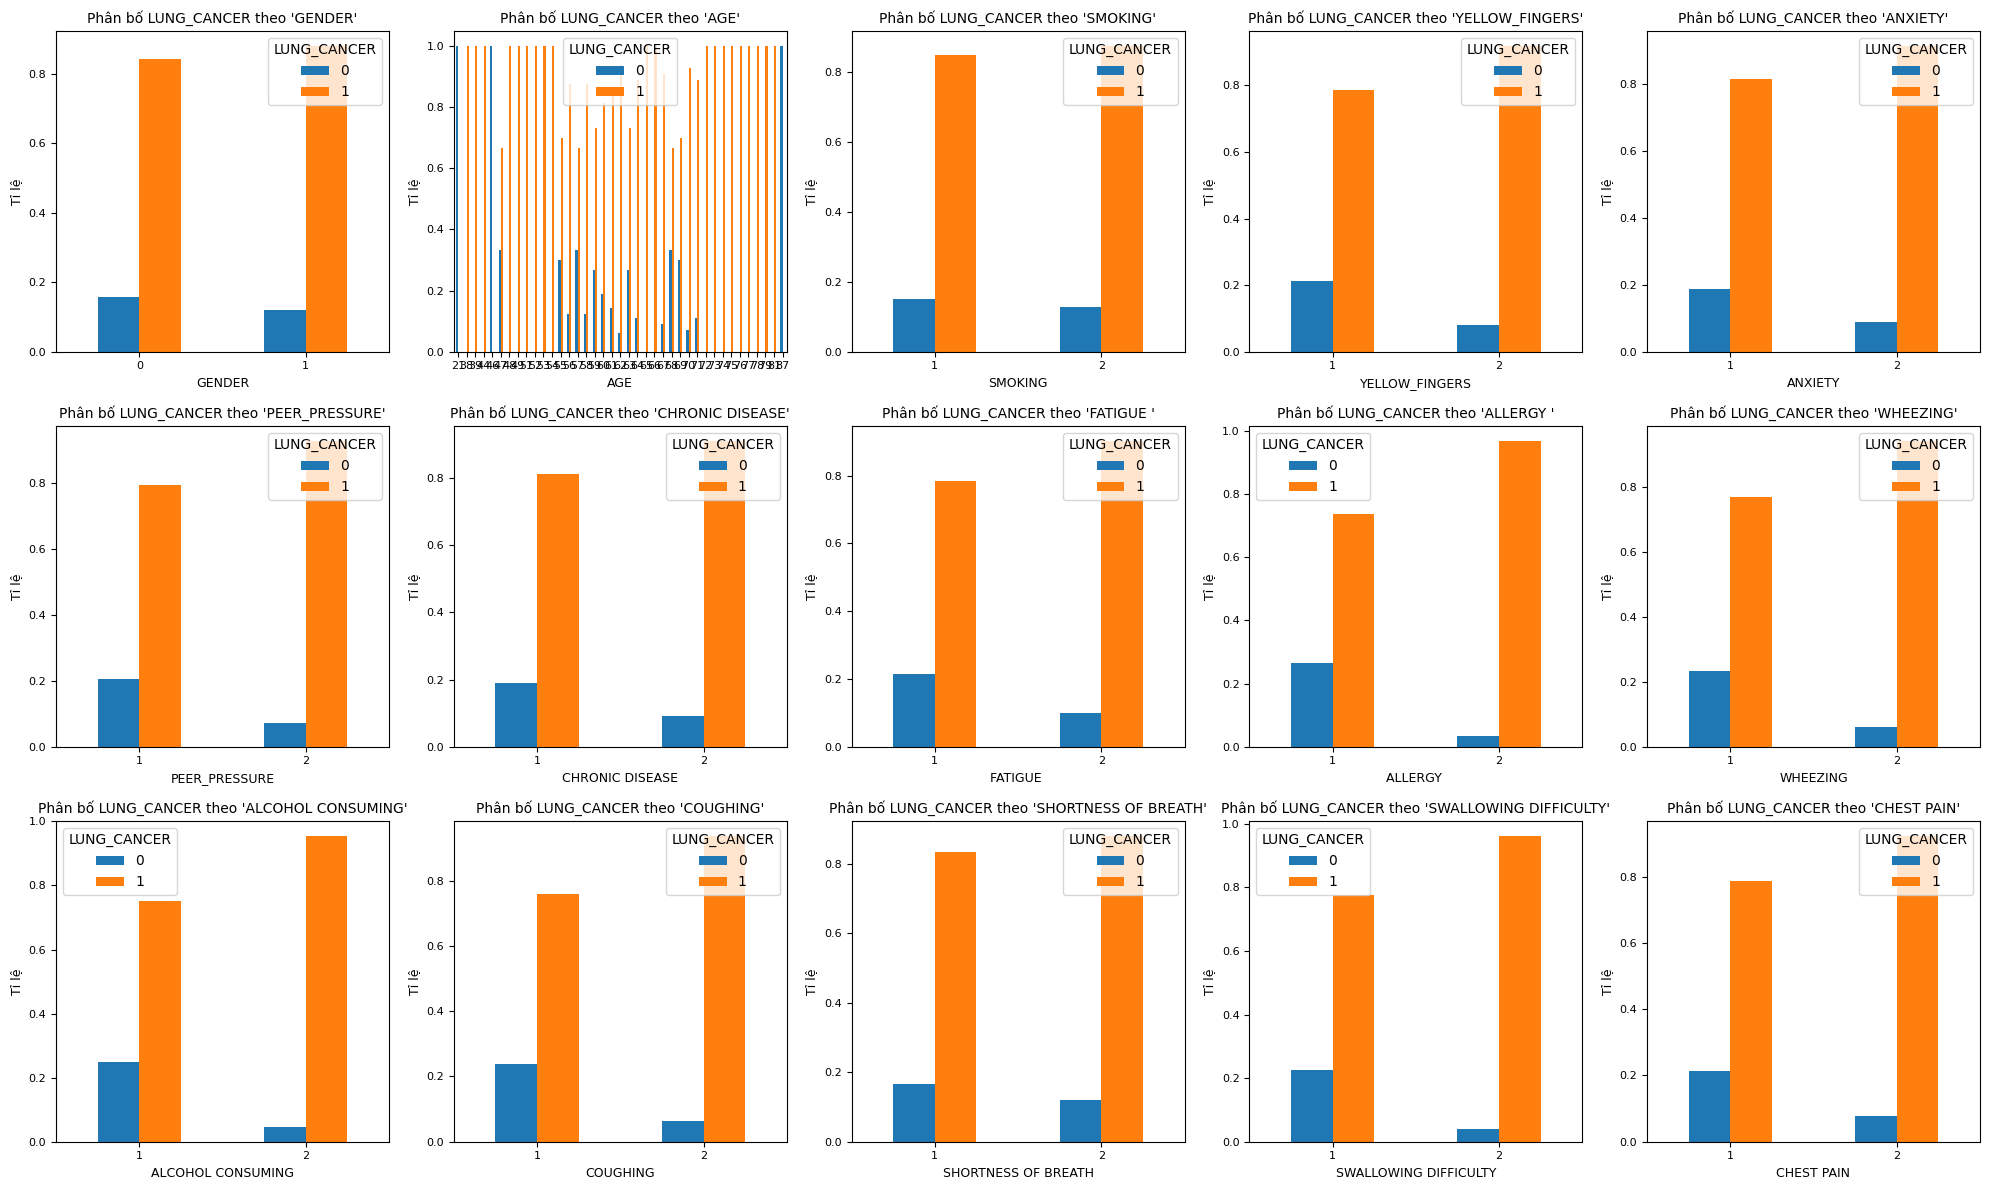

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_16_features(features, df):
    """
    Vẽ 15 biểu đồ (3 hàng, 5 cột) trên cùng 1 figure.
    Mỗi biểu đồ thể hiện tỉ lệ LUNG_CANCER = 0/1 khi nhóm theo cột tương ứng.
    """
    # Kiểm tra đủ 15 cột
    if len(features) != 15:
        raise ValueError("Bạn cần truyền đúng 15 cột vào 'features' để hiển thị 3 hàng × 5 cột.")

    # Tạo figure với 3 hàng, 5 cột
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12), sharey=False)
    # Thay đổi kích thước figsize để hiển thị rõ hơn

    # axes là mảng 2 chiều [3][5], ta flatten để duyệt dễ dàng
    axes = axes.ravel()  # chuyển về mảng 1 chiều dài 15

    for i, col in enumerate(features):
        ax = axes[i]  # Lấy đúng axes cho mỗi biểu đồ
        # Tính tỉ lệ (normalize=True) giữa LUNG_CANCER=0/1 cho từng giá trị của col
        data = df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack()
        # Vẽ biểu đồ cột
        data.plot(kind='bar', ax=ax)
        ax.set_title(f"Phân bố LUNG_CANCER theo '{col}'", fontsize=10)
        ax.set_xlabel(col, fontsize=9)
        ax.set_ylabel("Tỉ lệ", fontsize=9)

        # Tùy chọn: chỉnh font nhỏ để đỡ rối
        ax.tick_params(axis='x', labelrotation=0, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)

    # Xóa các axes trống (nếu có)
    # if len(features) < 15:
    #     for i in range(len(features), 15):
    #         fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Ví dụ gọi hàm:
columns_16 = [
    'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS',
    'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ',
    'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
    'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'
]
plot_16_features(columns_16[:-1], df)  # Lưu ý: cột LUNG_CANCER là nhãn, ta không group theo nó.

# **4. Vẽ ma trận tương quan của các biến trong DataFrame**


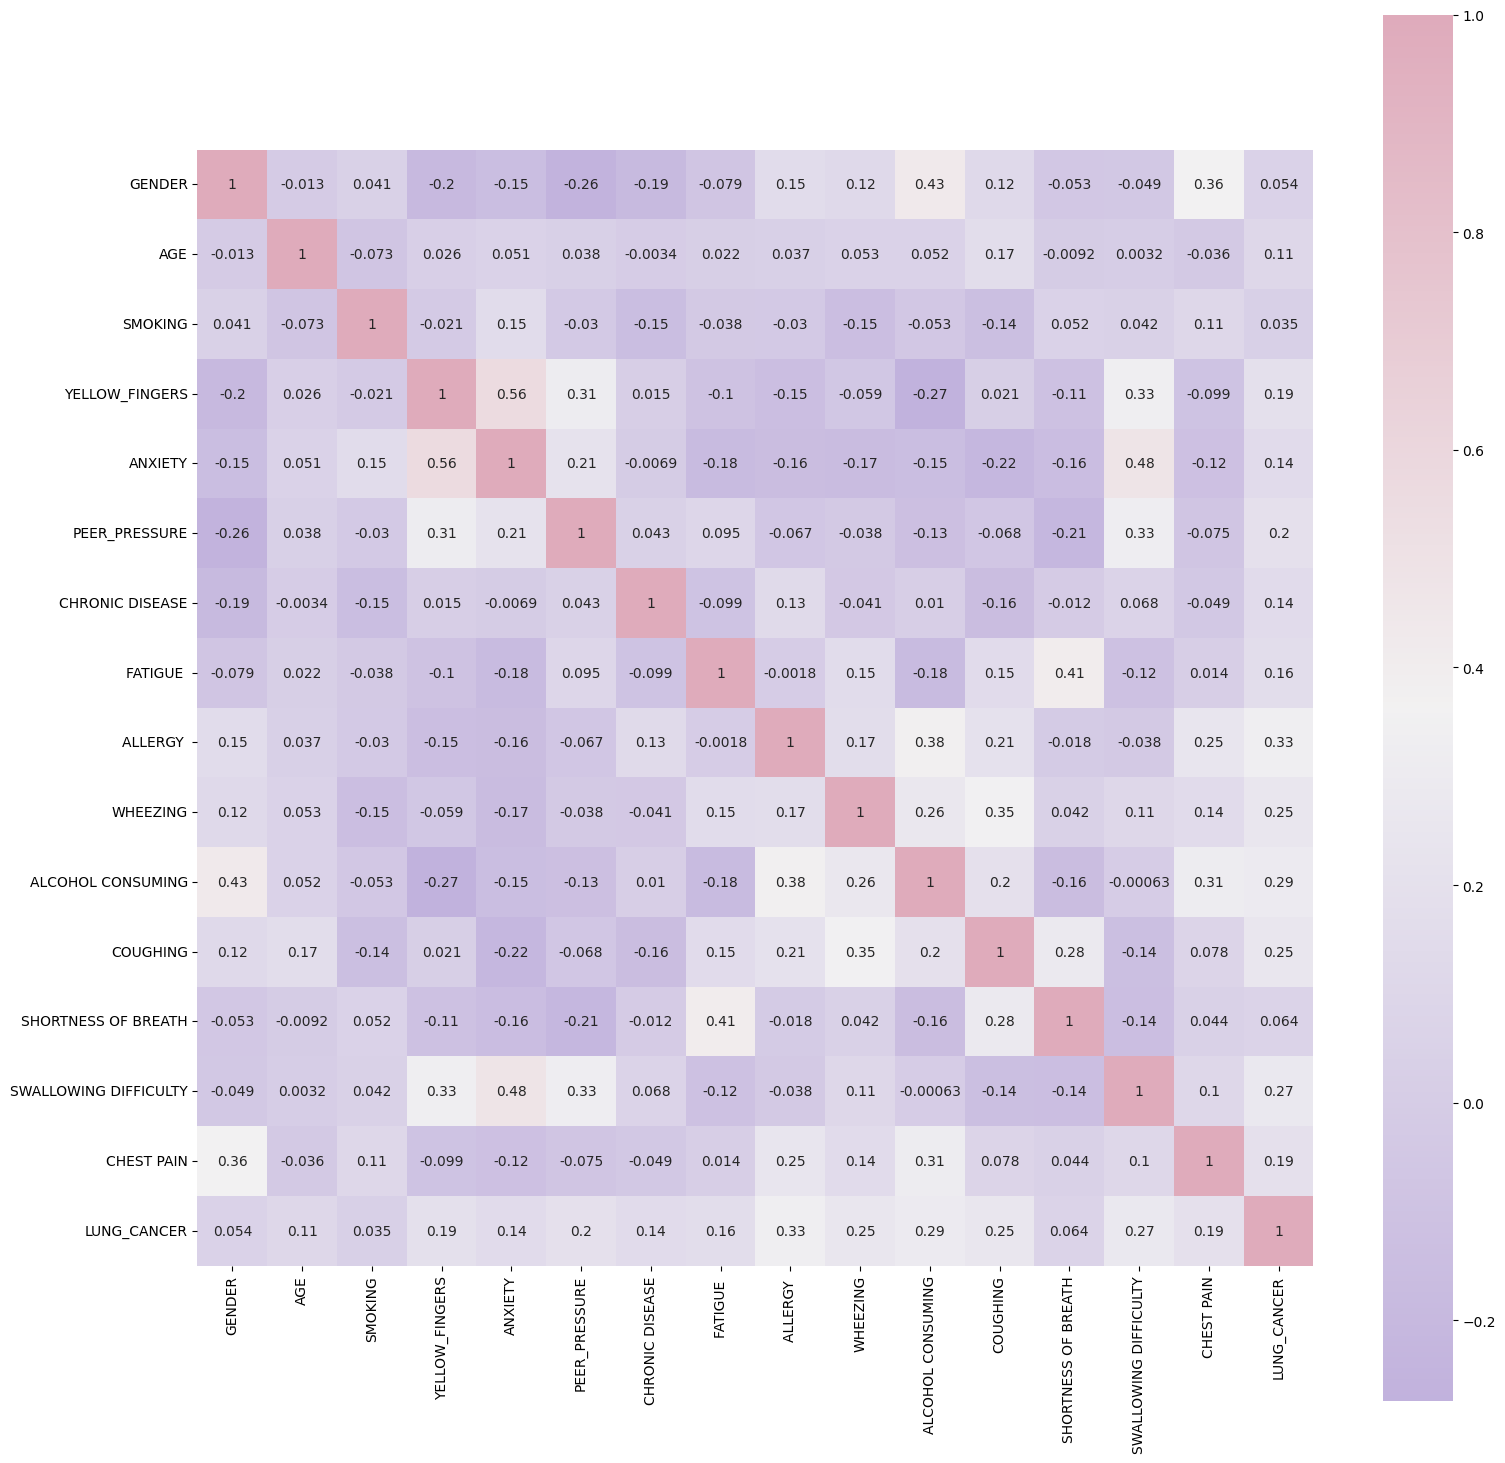

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Make sure pandas is imported

# Calculate the correlation matrix using your DataFrame (e.g., df)
cn = df.corr()  # This line is added

# Giả sử 'cn' là ma trận tương quan đã được tính từ DataFrame
cmap = sns.diverging_palette(280, -10, s=50, l=75, n=6, as_cmap=True)

# Tạo figure và ax với kích thước 18x18 inch
fig, ax = plt.subplots(figsize=(18, 18))

# Vẽ heatmap trên ax đã tạo
sns.heatmap(cn, cmap=cmap, annot=True, square=True, ax=ax)

plt.show()

###Loại bỏ GENDER, AGE, SMOKING và SHORTNESS vì không có mối tương quan cao với LUNG_CANCER

In [ ]:
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new


,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,2,1,1,2,1,2,2,2,2,2,1
1,1,1,1,2,2,2,1,1,1,2,2,1
2,1,1,2,1,2,1,2,1,2,1,2,0
3,2,2,1,1,1,1,1,2,1,2,2,0
4,2,1,1,1,1,1,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,2,2,2,1,1,2,2,1,2,2,1,1
280,1,1,1,2,2,2,1,1,1,1,1,0
281,1,1,1,1,2,2,1,1,1,1,2,0
282,2,2,1,1,1,1,1,1,1,2,2,0


In [ ]:
#Finding Correlation
cn=df_new.corr()
cn

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


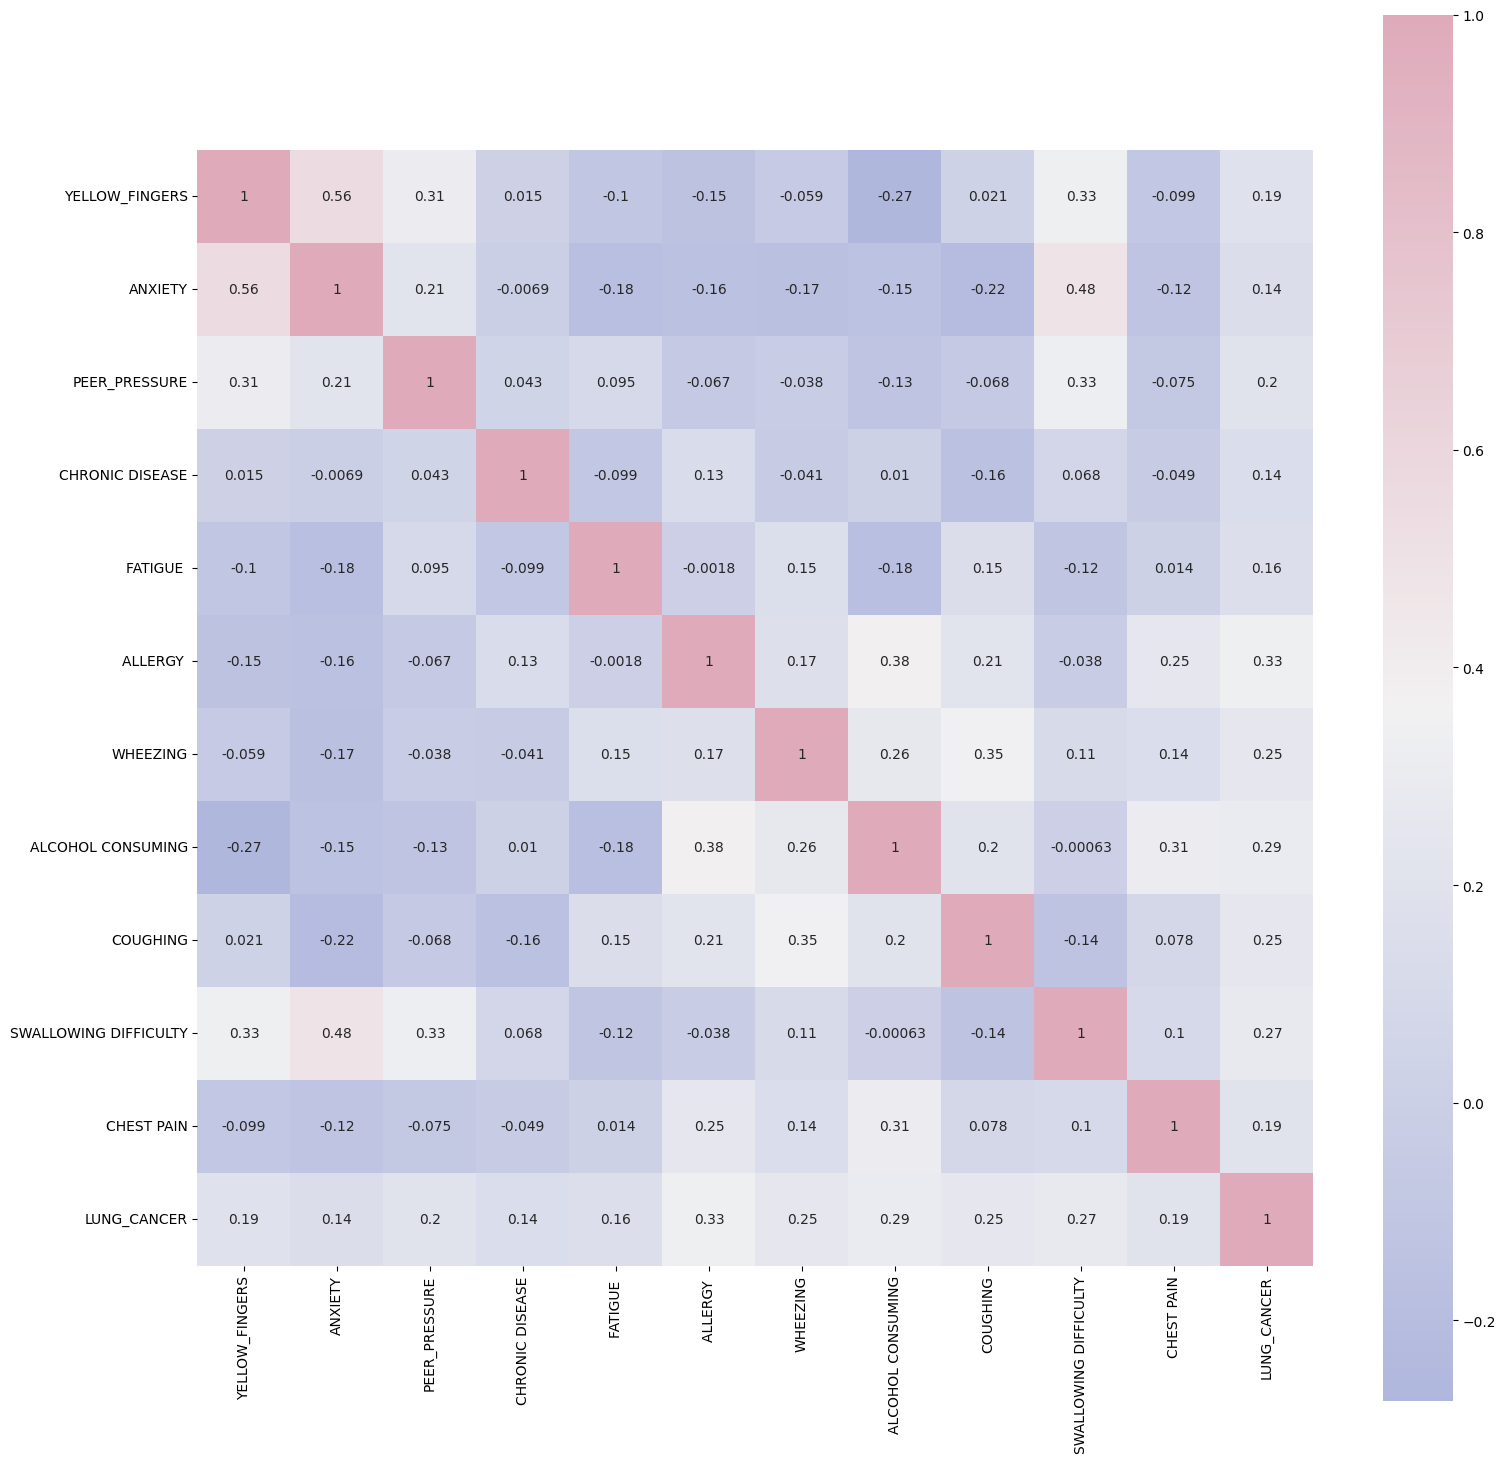

In [ ]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

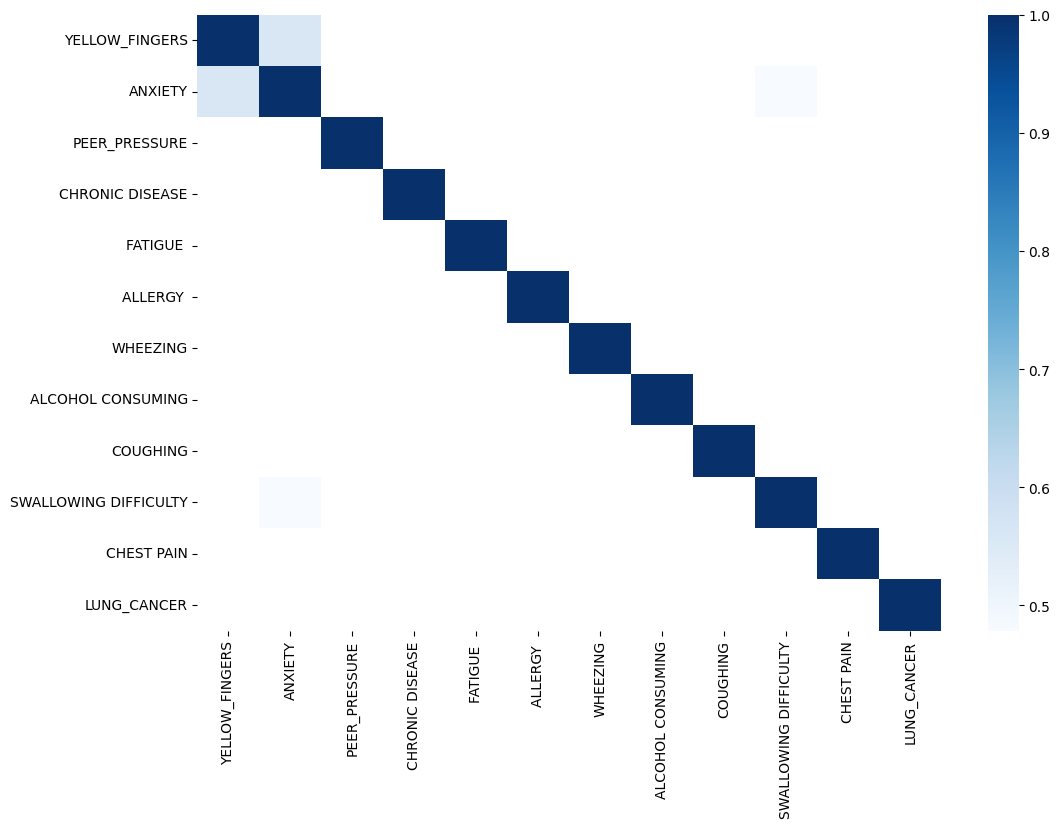

In [ ]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")




Trong bộ dữ liệu ung thư phổi, việc nhân giá trị của **ANXIETY** với **YELLOW_FINGERS** (tạo biến **ANXYELFIN**) có thể giúp phát hiện ra rằng khi một người có mức độ lo âu cao và cũng có dấu hiệu vàng ngón tay (liên quan đến hút thuốc), nguy cơ mắc ung thư phổi có thể tăng lên. Hiệu ứng này có thể không rõ ràng khi chỉ xem xét riêng rẽ từng biến.



In [ ]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,2,2,1,1,2,1,2,2,2,2,2,1,4
1,1,1,1,2,2,2,1,1,1,2,2,1,1
2,1,1,2,1,2,1,2,1,2,1,2,0,1
3,2,2,1,1,1,1,1,2,1,2,2,0,4
4,2,1,1,1,1,1,2,1,2,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2,2,2,1,1,2,2,1,2,2,1,1,4
280,1,1,1,2,2,2,1,1,1,1,1,0,1
281,1,1,1,1,2,2,1,1,1,1,2,0,1
282,2,2,1,1,1,1,1,1,1,2,2,0,4


# **5. Tách biến độc lập (X) và biến phụ thuộc (y)**


In [ ]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

# **6. Cân bằng dữ liệu bằng ADASYN**


In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [ ]:
len(X)


488

# **7. Chia dữ liệu thành tập huấn luyện và tập kiểm tra**


In [ ]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

# **8. Huấn luyện mô hình MLPClassifier**


In [ ]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

# **9. Dự đoán trên tập kiểm tra và in báo cáo đánh giá**


In [ ]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
#Model accuracy
from sklearn.metrics import classification_report # Import the classification_report function
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        62
           1       0.94      0.97      0.95        60

    accuracy                           0.95       122
   macro avg       0.95      0.95      0.95       122
weighted avg       0.95      0.95      0.95       122



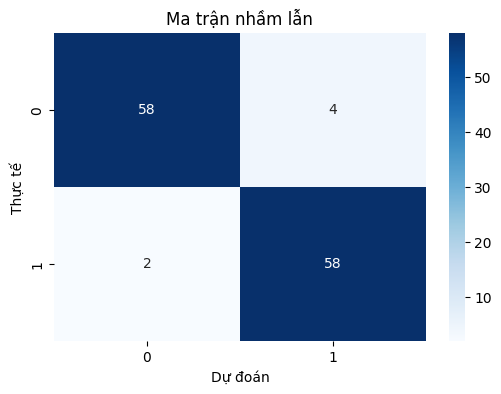

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Tính ma trận nhầm lẫn từ nhãn thực tế và dự đoán
cm = confusion_matrix(y_test, y_mlp_pred)

# Tạo figure với kích thước hợp lý (ví dụ 6x4 inch)
plt.figure(figsize=(6, 4))

# Vẽ heatmap cho ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn')
plt.show()




**Nhận xét tổng quan:**
- Tổng số mẫu trong tập kiểm tra: 58 + 4 + 2 + 58 = **122**.  
- Số dự đoán đúng: 58 + 58 = **116**.  
- Độ chính xác (accuracy) xấp xỉ: 116 / 122 ≈ **95%**.  

Điều này cho thấy mô hình phân loại hoạt động **khá tốt**, với số lượng dự đoán sai **không nhiều** (6 mẫu). Tỷ lệ dự đoán đúng giữa hai lớp cũng **tương đối cân bằng** (cùng 58 trường hợp đúng). Nếu so sánh chi tiết hơn:
- **False Positive (FP)** = 4  
- **False Negative (FN)** = 2  

Với lượng FP và FN nhỏ, mô hình duy trì được **cả precision và recall** ở mức cao cho cả hai lớp. Như vậy, có thể nói mô hình **đủ tin cậy** để áp dụng trong bài toán phân loại ung thư phổi trên tập dữ liệu này.

# **10. Đánh giá mô hình bằng K-Fold Cross Validation (10-fold)**


In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))


Multi-layer perceptron models' average accuracy: 0.9345238095238095
